In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [21]:
data = pd.read_csv("Traffic.csv")
data

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal
...,...,...,...,...,...,...,...,...,...
2971,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
2972,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
2973,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
2974,11:30:00 PM,9,Thursday,16,5,0,27,48,normal


# **Preparing dataset **

In [22]:
data.columns = data.columns.str.lower().str.replace(' ', '_')
data

,time,date,day_of_the_week,carcount,bikecount,buscount,truckcount,total,traffic_situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal
...,...,...,...,...,...,...,...,...,...
2971,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
2972,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
2973,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
2974,11:30:00 PM,9,Thursday,16,5,0,27,48,normal


In [23]:
data.isnull().sum()

time                 0
date                 0
day_of_the_week      0
carcount             0
bikecount            0
buscount             0
truckcount           0
total                0
traffic_situation    0
dtype: int64

In [24]:
# Convert the 'Time' column to a datetime object
data['time_new'] = pd.to_datetime(data['time'], format='%I:%M:%S %p')

# Extract hour, minute, and second
data['hour'] = data['time_new'].dt.hour
data['minute'] = data['time_new'].dt.minute
data['second'] = data['time_new'].dt.second

# Print the DataFrame with the new columns
data

,time,date,day_of_the_week,carcount,bikecount,buscount,truckcount,total,traffic_situation,time_new,hour,minute,second
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low,1900-01-01 00:00:00,0,0,0
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low,1900-01-01 00:15:00,0,15,0
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low,1900-01-01 00:30:00,0,30,0
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low,1900-01-01 00:45:00,0,45,0
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal,1900-01-01 01:00:00,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2971,10:45:00 PM,9,Thursday,16,3,1,36,56,normal,1900-01-01 22:45:00,22,45,0
2972,11:00:00 PM,9,Thursday,11,0,1,30,42,normal,1900-01-01 23:00:00,23,0,0
2973,11:15:00 PM,9,Thursday,15,4,1,25,45,normal,1900-01-01 23:15:00,23,15,0
2974,11:30:00 PM,9,Thursday,16,5,0,27,48,normal,1900-01-01 23:30:00,23,30,0


In [25]:
day_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7,
}

data['day_of_the_week'] = data['day_of_the_week'].replace(day_mapping)

In [26]:
traffic_situation_mapping = {'low': 0, 'normal': 1, 'high': 2, 'heavy':3}
data['traffic_situation'].replace(traffic_situation_mapping, inplace=True)

In [27]:
#Checking values in all columns
for col in data.columns:
    print(col)
    print(data[col].unique()[:5])
    print(data[col].nunique())
    print()

time
['12:00:00 AM' '12:15:00 AM' '12:30:00 AM' '12:45:00 AM' '1:00:00 AM']
96

date
[10 11 12 13 14]
31

day_of_the_week
[2 3 4 5 6]
7

carcount
[31 49 46 51 57]
172

bikecount
[ 0  6  4 22 16]
71

buscount
[ 4  3  2 15  5]
51

truckcount
[ 4  3  6  5 16]
41

total
[39 55 58 94 53]
239

traffic_situation
[0 1 3 2]
4

time_new
<DatetimeArray>
['1900-01-01 00:00:00', '1900-01-01 00:15:00', '1900-01-01 00:30:00',
 '1900-01-01 00:45:00', '1900-01-01 01:00:00']
Length: 5, dtype: datetime64[ns]
96

hour
[0 1 2 3 4]
24

minute
[ 0 15 30 45]
4

second
[0]
1



In [28]:
data.dtypes

time                         object
date                          int64
day_of_the_week               int64
carcount                      int64
bikecount                     int64
buscount                      int64
truckcount                    int64
total                         int64
traffic_situation             int64
time_new             datetime64[ns]
hour                          int32
minute                        int32
second                        int32
dtype: object

In [29]:
#selecting columns for the dataset
dataset = data[['date', 'day_of_the_week', 'carcount', 'bikecount', 'buscount', 'truckcount', 'total', 'traffic_situation', 'hour',	'minute']]
dataset

,date,day_of_the_week,carcount,bikecount,buscount,truckcount,total,traffic_situation,hour,minute
0,10,2,31,0,4,4,39,0,0,0
1,10,2,49,0,3,3,55,0,0,15
2,10,2,46,0,3,6,55,0,0,30
3,10,2,51,0,2,5,58,0,0,45
4,10,2,57,6,15,16,94,1,1,0
...,...,...,...,...,...,...,...,...,...,...
2971,9,4,16,3,1,36,56,1,22,45
2972,9,4,11,0,1,30,42,1,23,0
2973,9,4,15,4,1,25,45,1,23,15
2974,9,4,16,5,0,27,48,1,23,30


# Checking Feature Correlation

In [30]:
data_numeric = data.copy()
data_numeric = data.drop(['second', 'time_new', 'time'], axis=1)
data_numeric.describe()

,date,day_of_the_week,carcount,bikecount,buscount,truckcount,total,traffic_situation,hour,minute
count,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.00000,2976.000000
mean,16.000000,3.903226,68.696573,14.917339,15.279570,15.324933,114.218414,1.464046,11.50000,22.500000
std,8.945775,1.940643,45.850693,12.847518,14.341986,10.603833,60.190627,0.954803,6.92335,16.773328
min,1.000000,1.000000,6.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.00000,0.000000
25%,8.000000,2.000000,19.000000,5.000000,1.000000,6.000000,55.000000,1.000000,5.75000,11.250000
50%,16.000000,4.000000,64.000000,12.000000,12.000000,14.000000,109.000000,1.000000,11.50000,22.500000
75%,24.000000,6.000000,107.000000,22.000000,25.000000,23.000000,164.000000,2.000000,17.25000,33.750000
max,31.000000,7.000000,180.000000,70.000000,50.000000,40.000000,279.000000,3.000000,23.00000,45.000000


In [31]:
data_numeric.corr()

,date,day_of_the_week,carcount,bikecount,buscount,truckcount,total,traffic_situation,hour,minute
date,1.000000e+00,-1.672874e-02,-0.013453,-0.005089,-0.015536,0.024734,-0.010679,-0.007438,2.814316e-16,2.865092e-17
day_of_the_week,-1.672874e-02,1.000000e+00,-0.002230,0.063583,-0.046031,-0.021895,-0.002953,-0.019475,-2.874150e-16,-5.201713e-17
carcount,-1.345292e-02,-2.230275e-03,1.000000,0.722539,0.692994,-0.628157,0.970443,0.746280,1.480863e-01,-3.359952e-03
bikecount,-5.088914e-03,6.358283e-02,0.722539,1.000000,0.566364,-0.575399,0.797429,0.609285,1.405488e-01,-7.978481e-03
buscount,-1.553604e-02,-4.603119e-02,0.692994,0.566364,1.000000,-0.546931,0.790705,0.733915,1.657507e-01,-1.615958e-02
truckcount,2.473362e-02,-2.189502e-02,-0.628157,-0.575399,-0.546931,1.000000,-0.555471,-0.327309,-1.695231e-02,-1.119745e-03
total,-1.067861e-02,-2.952752e-03,0.970443,0.797429,0.790705,-0.555471,1.000000,0.815747,1.793136e-01,-8.310162e-03
traffic_situation,-7.437779e-03,-1.947491e-02,0.746280,0.609285,0.733915,-0.327309,0.815747,1.000000,1.001473e-01,-2.597320e-02
hour,2.814316e-16,-2.874150e-16,0.148086,0.140549,0.165751,-0.016952,0.179314,0.100147,1.000000e+00,-1.003662e-17
minute,2.865092e-17,-5.201713e-17,-0.003360,-0.007978,-0.016160,-0.001120,-0.008310,-0.025973,-1.003662e-17,1.000000e+00


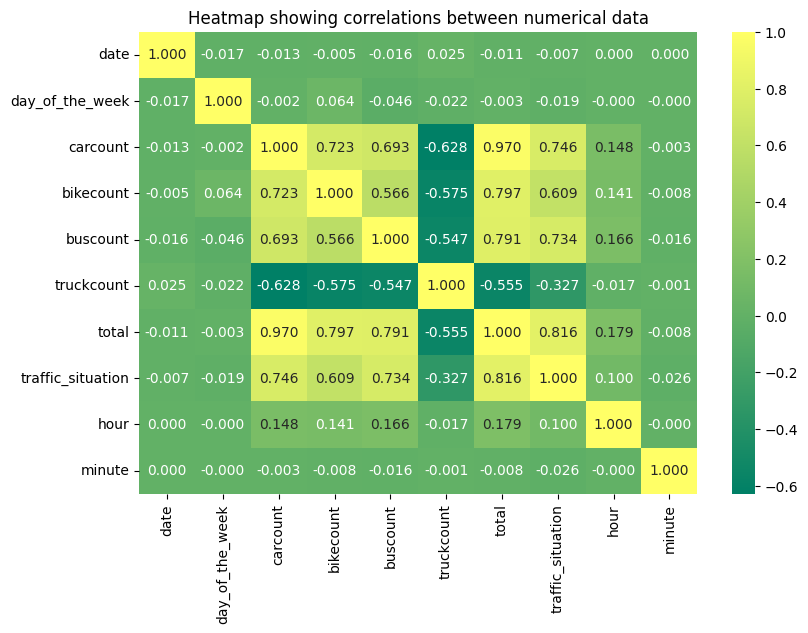

In [32]:
plt.figure(figsize=(9, 6))
sns.heatmap(data_numeric.corr(), cmap="summer", annot=True, fmt='.3f')
plt.title('Heatmap showing correlations between numerical data')
plt.show();

In [33]:
data_numeric.corr().unstack().sort_values(ascending = False)

date               date                 1.000000
day_of_the_week    day_of_the_week      1.000000
hour               hour                 1.000000
traffic_situation  traffic_situation    1.000000
total              total                1.000000
                                          ...   
                   truckcount          -0.555471
truckcount         bikecount           -0.575399
bikecount          truckcount          -0.575399
carcount           truckcount          -0.628157
truckcount         carcount            -0.628157
Length: 100, dtype: float64

## Split the data

In [34]:
len(dataset)

2976

In [35]:
df_full_train, df_test = train_test_split(dataset, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [36]:
len(df_train), len(df_val), len(df_test)

(1785, 595, 596)

In [37]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [38]:
y_train = df_train.traffic_situation.values
y_val = df_val.traffic_situation.values
y_test = df_test.traffic_situation.values

In [39]:
del df_train['traffic_situation']
del df_val['traffic_situation']
del df_test['traffic_situation']

In [40]:
dv = DictVectorizer(sparse=True)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

# Training the model

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import xgboost as xgb

Using Linear regression Model with default paramters for predicting

In [43]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [44]:
y_pred = model.predict(X_val)

In [49]:
accuracy = accuracy_score(y_val, y_pred)
accuracy

0.7831932773109244

In [ ]:
features = ['date', 'day_of_the_week', 'carcount', 'bikecount', 'buscount', 'truckcount', 'total', 'hour',	'minute']

Finding the best value for Regularization

In [55]:
scores = []

for C in [0.001, 0.1, 0.5, 1.0, 5, 10, 15, 100, 1000]:
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    scores.append((C, accuracy))
    print('C=%4f, Accuracy=%.3f' % (C, accuracy))

C=0.001000, Accuracy=0.739
C=0.100000, Accuracy=0.758
C=0.500000, Accuracy=0.775
C=1.000000, Accuracy=0.783
C=5.000000, Accuracy=0.792
C=10.000000, Accuracy=0.793
C=15.000000, Accuracy=0.793
C=100.000000, Accuracy=0.797
C=1000.000000, Accuracy=0.798


Using Random Forest for training the model

In [56]:
rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
accuracy

0.9949579831932773

Finding the optimal number of estimators 

In [67]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, max_depth=None, random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    scores.append(( n, accuracy))

In [68]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'accuracy'])

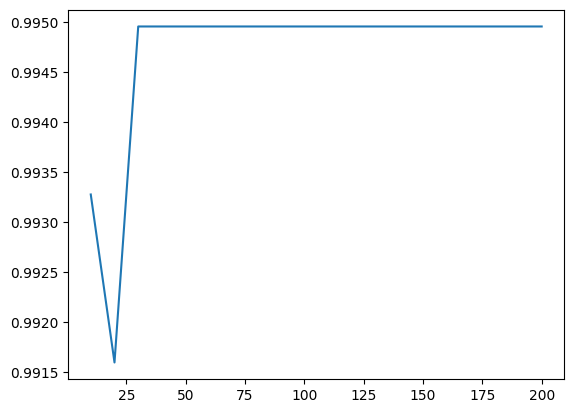

In [69]:
plt.plot(df_scores.n_estimators, df_scores.accuracy)

In [ ]:
scores = []
for d in  [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=None, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        accuracy = accuracy_score(y_val, y_pred)
        scores.append((d, n, accuracy))

In [73]:
df_scores = pd.DataFrame(scores, columns=['max_depth','n_estimators', 'accuracy'])

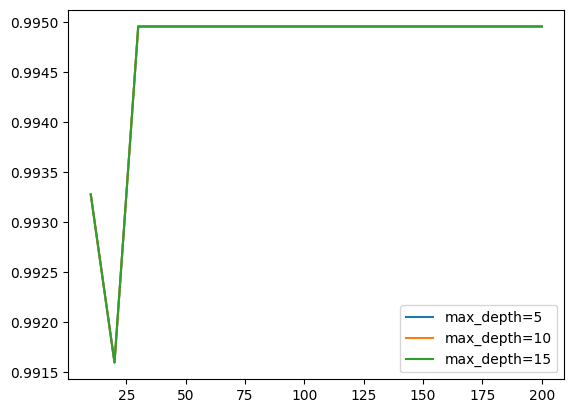

In [74]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]

    plt.plot(df_subset.n_estimators, df_subset.accuracy,
             label='max_depth=%d' % d)

plt.legend()